## `Logistic Regression`

1. Business Understanding

2. Data Mining

3. Data Cleaning

4. Data Exploration

5. Feature Engineering

6. Predictive Modelling

7. Data Visualization

#### Business Understanding

Purchase Analysis, Predicting whether particular person can purchase/ not purchase.

#### Data Mining 

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [3]:
# Import the dataset
dataset=pd.read_csv('Purchase.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.shape

(400, 5)

#### Data Cleaning

In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
dataset.info()  # full information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# dataset.fillna(dataset.mean()) , if we have null values

#### Data Exploration

In [9]:
dataset.corr()  #  Correlation

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


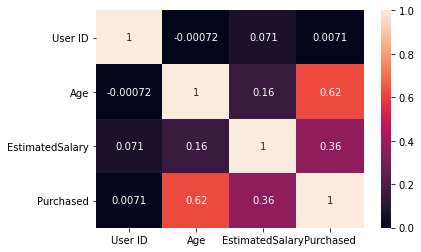

In [10]:
sb.heatmap(dataset.corr(),annot=True);

In [11]:
dataset['Purchased'].unique()

array([0, 1], dtype=int64)

#### Feature Engineering

In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X=dataset.iloc[:,[2,3]].values  # Independent variable
y=dataset.iloc[:,4].values   # Dependent variable

#### Predictive Modelling

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [15]:
X_train.shape

(360, 2)

In [16]:
X_test.shape

(40, 2)

In [17]:
y_train.shape

(360,)

In [18]:
y_test.shape

(40,)

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)   #  Training Process/fitting the model

LogisticRegression()

In [20]:
# Predicting the test data results
y_pred=classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
y_pred_prob=classifier.predict_proba(X_test)

In [23]:
y_pred_prob

array([[0.54215453, 0.45784547],
       [0.52426532, 0.47573468],
       [0.53636228, 0.46363772],
       [0.5382942 , 0.4617058 ],
       [0.52426532, 0.47573468],
       [0.50971254, 0.49028746],
       [0.50728481, 0.49271519],
       [0.56948644, 0.43051356],
       [0.53297882, 0.46702118],
       [0.52087245, 0.47912755],
       [0.52378075, 0.47621925],
       [0.52668745, 0.47331255],
       [0.52668745, 0.47331255],
       [0.53732838, 0.46267162],
       [0.54167225, 0.45832775],
       [0.55658206, 0.44341794],
       [0.53732838, 0.46267162],
       [0.5411899 , 0.4588101 ],
       [0.56280593, 0.43719407],
       [0.51068352, 0.48931648],
       [0.52281149, 0.47718851],
       [0.56948644, 0.43051356],
       [0.52474984, 0.47525016],
       [0.55082111, 0.44917889],
       [0.51359591, 0.48640409],
       [0.56805695, 0.43194305],
       [0.54215453, 0.45784547],
       [0.538777  , 0.461223  ],
       [0.53007629, 0.46992371],
       [0.54167226, 0.45832774],
       [0.

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[32,  0],
       [ 8,  0]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.8

In [26]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
X_train

array([[-1.05714987,  0.53420426],
       [ 0.2798728 , -0.51764734],
       [-1.05714987,  0.41733186],
       [-0.29313691, -1.45262654],
       [ 0.47087604,  1.23543867],
       [-1.05714987, -0.34233874],
       [-0.10213368,  0.30045946],
       [ 1.33039061,  0.59264046],
       [-1.15265148, -1.16044554],
       [ 1.04388575,  0.47576806],
       [ 1.8078987 ,  1.52761967],
       [-0.38863853, -1.30653604],
       [-0.29313691, -0.37155684],
       [-0.38863853,  1.32309297],
       [ 1.99890194,  0.53420426],
       [ 0.66187928, -1.10200934],
       [-0.86614663,  0.38811376],
       [-1.15265148,  0.30045946],
       [ 1.04388575, -1.21888174],
       [-1.43915634, -1.45262654],
       [-0.57964177, -1.51106275],
       [ 2.09440356, -0.80982834],
       [-1.82116282,  0.18358706],
       [-0.19763529,  0.85560337],
       [-1.82116282, -1.27731794],
       [ 2.09440356,  0.38811376],
       [-1.34365472,  0.56342236],
       [-1.05714987, -0.34233874],
       [ 0.18437118,

In [28]:
classifier1=LogisticRegression()
classifier1.fit(X_train,y_train)

LogisticRegression()

In [29]:
# Predicting the test data results
y_pred1=classifier1.predict(X_test)

In [30]:
y_pred1  # predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
y_test  # actual

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [32]:
confusion_matrix(y_test,y_pred1)

array([[31,  1],
       [ 1,  7]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred1)

0.95

In [34]:
y_pred_prob1=classifier1.predict_proba(X_test)

In [35]:
y_pred_prob1

array([[0.88526912, 0.11473088],
       [0.82673479, 0.17326521],
       [0.80088355, 0.19911645],
       [0.90852539, 0.09147461],
       [0.89850836, 0.10149164],
       [0.99163869, 0.00836131],
       [0.98384755, 0.01615245],
       [0.27058339, 0.72941661],
       [0.99403159, 0.00596841],
       [0.4823236 , 0.5176764 ],
       [0.96240202, 0.03759798],
       [0.96968133, 0.03031867],
       [0.83353724, 0.16646276],
       [0.6235348 , 0.3764652 ],
       [0.98425233, 0.01574767],
       [0.66474585, 0.33525415],
       [0.71435801, 0.28564199],
       [0.98754107, 0.01245893],
       [0.01137959, 0.98862041],
       [0.95539869, 0.04460131],
       [0.90682175, 0.09317825],
       [0.03703949, 0.96296051],
       [0.71361451, 0.28638549],
       [0.11636719, 0.88363281],
       [0.99526213, 0.00473787],
       [0.02724077, 0.97275923],
       [0.92095316, 0.07904684],
       [0.9220288 , 0.0779712 ],
       [0.80059309, 0.19940691],
       [0.84061269, 0.15938731],
       [0.

C:\Users\Meghashyam\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


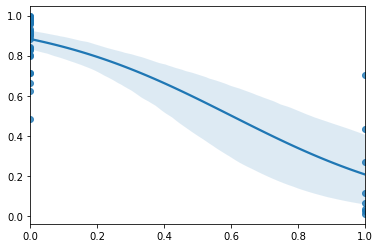

In [36]:
sb.regplot(y_test,y_pred_prob1[:,0],logistic=True);

In [37]:
# Statsmodel
import statsmodels.api as sm
log=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.422419
         Iterations 7


In [38]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  360
Model:                          Logit   Df Residuals:                      358
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.3615
Time:                        16:26:41   Log-Likelihood:                -152.07
converged:                       True   LL-Null:                       -238.16
Covariance Type:            nonrobust   LLR p-value:                 2.467e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9951      0.226      8.814      0.000       1.552       2.439
x2             1.0419      0.179      5.819      0.000       0.691       1.393
==============================================================================
"""

In [39]:
#roc curve, auc 
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob1[:,1])

In [42]:
fpr

array([0.     , 0.     , 0.     , 0.09375, 0.09375, 1.     ])

In [43]:
tpr

array([0.   , 0.125, 0.875, 0.875, 1.   , 1.   ])

In [48]:
thresholds

array([1.98862041, 0.98862041, 0.5651032 , 0.33525415, 0.29869283,
       0.00361081])

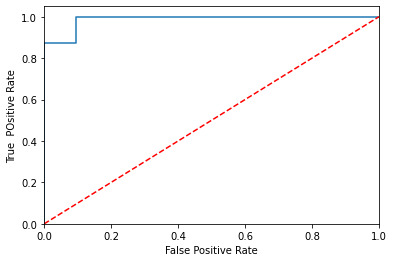

In [46]:
#ROC plotting
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True  POsitive Rate');


In [49]:
auc=roc_auc_score(y_test,y_pred1) # measure of seperatability 

In [50]:
auc

0.921875

In [62]:
y_pred_prob=classifier1.predict_proba(X_test)[:,1]  #  taken the probability values 
y_pred_prob=y_pred_prob.reshape(1,-1)  #  multidimension-- single row , multiple column

In [63]:
y_pred_prob

array([[0.11473088, 0.17326521, 0.19911645, 0.09147461, 0.10149164,
        0.00836131, 0.01615245, 0.72941661, 0.00596841, 0.5176764 ,
        0.03759798, 0.03031867, 0.16646276, 0.3764652 , 0.01574767,
        0.33525415, 0.28564199, 0.01245893, 0.98862041, 0.04460131,
        0.09317825, 0.96296051, 0.28638549, 0.88363281, 0.00473787,
        0.97275923, 0.07904684, 0.0779712 , 0.19940691, 0.15938731,
        0.02051155, 0.29869283, 0.93508387, 0.15788875, 0.01485191,
        0.00361081, 0.02021495, 0.06864488, 0.02903441, 0.5651032 ]])

In [54]:
confusion_matrix(y_test,y_pred1)  #  old confusion matrix

array([[31,  1],
       [ 1,  7]], dtype=int64)

In [64]:
# Tuning Threshold
from sklearn.preprocessing import binarize
y_pred_class=binarize(y_pred_prob,0.55)[0]

C:\Users\Meghashyam\anaconda31\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [66]:
y_pred_class

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1.])

In [67]:
y_pred_class=y_pred_class.astype(int)

In [68]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [69]:
confusion_matrix(y_test,y_pred1)   #old confusion matrix

array([[31,  1],
       [ 1,  7]], dtype=int64)

In [71]:
confusion_matrix(y_test,y_pred_class)

array([[32,  0],
       [ 1,  7]], dtype=int64)

In [72]:
accuracy_score(y_test,y_pred_class)

0.975

In [73]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.88      0.93         8

    accuracy                           0.97        40
   macro avg       0.98      0.94      0.96        40
weighted avg       0.98      0.97      0.97        40

